# the data we can see it as 3 senarios 
# first :
 by using clusting then use col result and make classification on it
# second :
 we use regression on col G3 as y to predict the result 
#third : 
 we use classification on school col as y to predict it 

In [1]:
#import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge

In [2]:
#knn algorithm
def kn(x_train,y_train,x_test,y_test):
  kn = KNeighborsClassifier(n_neighbors=9)
  kn.fit(x_train, y_train)
  prd4 = kn.predict(x_test)
  print('accuracy', metrics.accuracy_score(y_test, prd4) * 100, '%')

In [3]:
#random forst
def forst(x_train,y_train,x_test,y_test):
  forest = RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=10)
  forest.fit(x_train, y_train)
  prd6 = forest.predict(x_test)
  print('accuracy', metrics.accuracy_score(y_test, prd6) * 100, '%')

In [4]:
#naive base
def km(x_train,y_train,x_test,y_test):
  km = BernoulliNB()
  km.fit(x_train, y_train)
  prd5 = km.predict(x_test)
  print('accuracy', metrics.accuracy_score(y_test, prd5) * 100, '%')

In [5]:
#desion tree
def dtc(x_train,y_train,x_test,y_test):
  dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
  dtc = dtc.fit(x_train, y_train)
  prd1 = dtc.predict(x_test)
  print('accuracy', metrics.accuracy_score(y_test, prd1) * 100, '%')

In [6]:
#svm
def svm(x_train,y_train,x_test,y_test):
  s = SVC()
  s.fit(x_train, y_train)
  prd3 = s.predict(x_test)
  print('accuracy', metrics.accuracy_score(y_test, prd3) * 100, '%')

In [7]:
#LogisticRegression
def logisticr(x_train,y_train,x_test,y_test):
  lg = LogisticRegression()
  lg = lg.fit(x_train, y_train)
  prd2 = lg.predict(x_test)
  print('accuracy', metrics.accuracy_score(y_test, prd2) * 100, '%')

In [8]:
#making plot
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  # plt.grid(False)
  plt.show()

In [9]:
#removing row 
def remove_row(df, lis):
  lis = sorted(set(lis))
  df = df.drop(lis)
  return df

In [10]:
#show numbers of cluster
def optimise_k_mean(df, k):
  means=[]
  inertias=[]

  for k in range(1, k):
    Kmeans = KMeans(n_clusters=k)
    Kmeans.fit(df)
    means.append(k)
    inertias.append(Kmeans.inertia_)
  
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel("Number of cluster")
  plt.ylabel("Inertias")
  plt.show()


In [11]:
#sprit data
def train_test(x,y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)
  scaler.fit(x_train)
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)
  x_train = np.nan_to_num(x_train)
  x_test = np.nan_to_num(x_test)
  return x_train,x_test,y_train,y_test

In [12]:
#remove outliars
def outliars(df, ft):
  q1 = df[ft].quantile(0.25)
  q3 = df[ft].quantile(0.75)
  iqr = q3 - q1
  lower_pound = q1 - 1.5*iqr
  upper_pound = q3 + 1.5*iqr
  lis = df.index[(df[ft] < lower_pound) | (df[ft] > upper_pound)]
  return lis

In [13]:
#preprossing data
df = pd.read_csv("StudentsPerformance.csv")
df = df.iloc[:,1:]
df.drop_duplicates(inplace=True)
df.dropna(inplace = True, axis=0)
df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df.describe()

,school,sex,age,goout,internet,romantic,studytime,failures,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000
mean,0.883544,0.473418,16.696203,3.108861,0.832911,0.334177,2.035443,0.334177,3.554430,5.708861,10.782848,12.273471,12.64076
std,0.321177,0.499926,1.276043,1.113278,0.373528,0.472300,0.839240,0.743651,1.390303,8.003096,3.521057,4.086833,5.14487
min,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.713843,0.000000,0.00000
25%,1.000000,0.000000,16.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,8.000000,9.987707,10.00000
50%,1.000000,0.000000,17.000000,3.000000,1.000000,0.000000,2.000000,0.000000,4.000000,4.000000,11.000000,12.243752,13.36758
75%,1.000000,1.000000,18.000000,4.000000,1.000000,1.000000,2.000000,0.000000,5.000000,8.000000,13.000000,15.075698,16.47307
max,1.000000,1.000000,22.000000,5.000000,1.000000,1.000000,4.000000,3.000000,5.000000,75.000000,19.000000,20.000000,20.00000


In [14]:
# calculate Pearson's correlation
corr, _ = pearsonr(df['G1'], df['G2'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.851


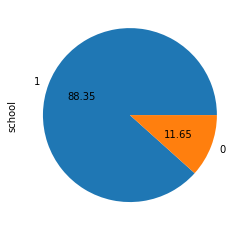

In [15]:
df['school'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

88.35% of student from GP school

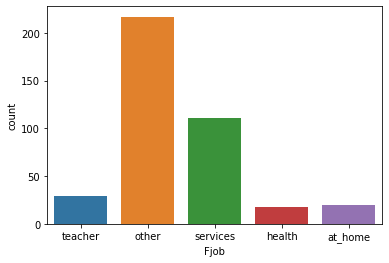

In [16]:
sns.countplot(x='Fjob',data=df)

show father's job

<Figure size 1440x720 with 0 Axes>

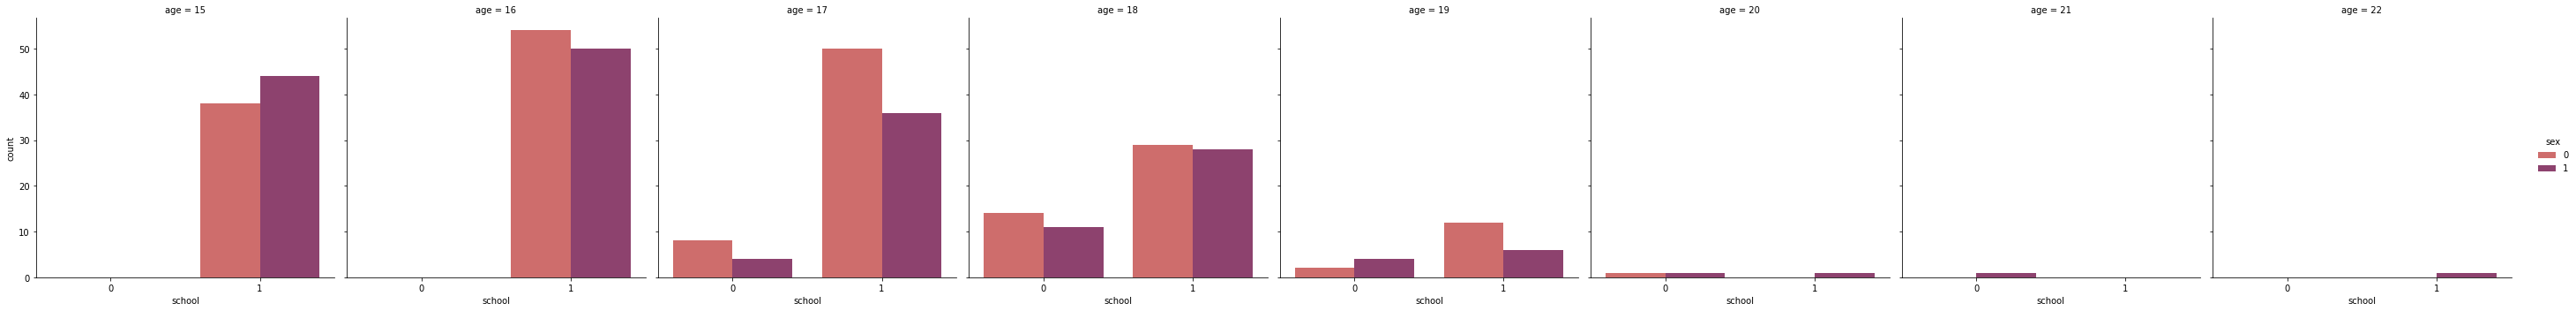

In [17]:
plt.figure(figsize=(20,10))
sns.catplot(x='school', hue='sex', col='age', data=df, kind='count', palette='flare')
plt.show()

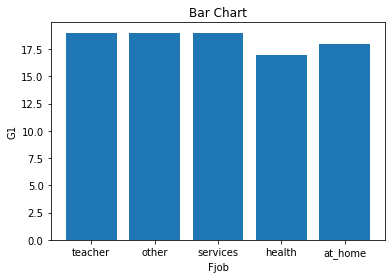

In [18]:
plt.bar(df['Fjob'], df['G1'])
plt.title("Bar Chart")
plt.xlabel('Fjob')
plt.ylabel('G1')
plt.show()

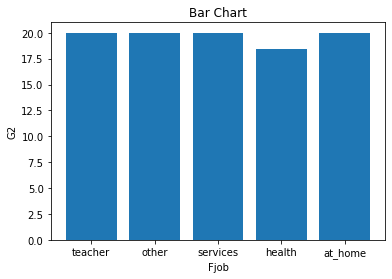

In [19]:
plt.bar(df['Fjob'], df['G2'])
plt.title("Bar Chart")
plt.xlabel('Fjob')
plt.ylabel('G2')
plt.show()

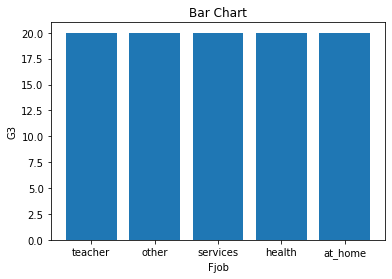

In [20]:
plt.bar(df['Fjob'], df['G3'])
plt.title("Bar Chart")
plt.xlabel('Fjob')
plt.ylabel('G3')
plt.show()

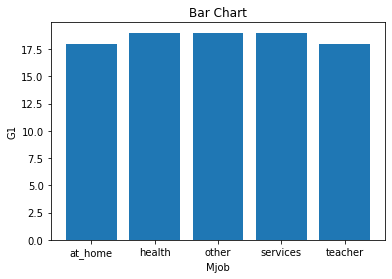

In [21]:
plt.bar(df['Mjob'], df['G1'])
plt.title("Bar Chart")
plt.xlabel('Mjob')
plt.ylabel('G1')
plt.show()

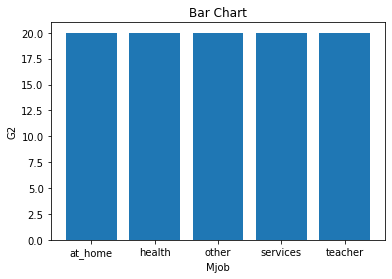

In [22]:
plt.bar(df['Mjob'], df['G2'])
plt.title("Bar Chart")
plt.xlabel('Mjob')
plt.ylabel('G2')
plt.show()

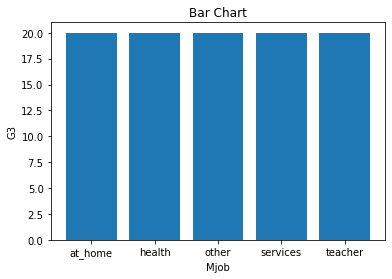

In [23]:
plt.bar(df['Mjob'], df['G3'])
plt.title("Bar Chart")
plt.xlabel('Mjob')
plt.ylabel('G3')
plt.show()

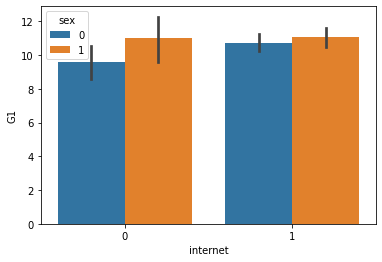

In [24]:
sns.barplot(x='internet',y='G1',hue='sex',data=df)

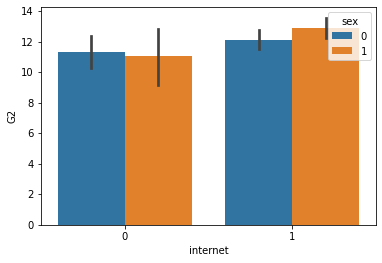

In [25]:
sns.barplot(x='internet',y='G2',hue='sex',data=df)

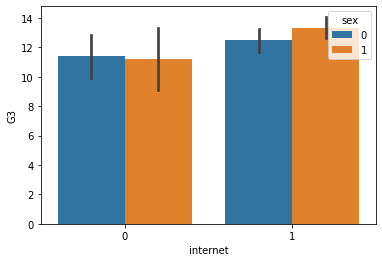

In [26]:
sns.barplot(x='internet',y='G3',hue='sex',data=df)

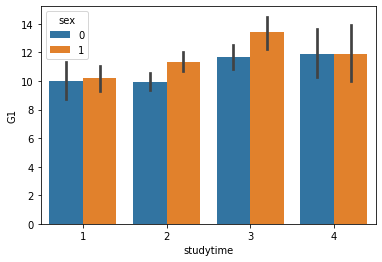

In [27]:
sns.barplot(x='studytime',y='G1',hue='sex',data=df)

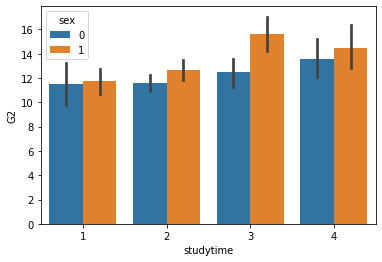

In [28]:
sns.barplot(x='studytime',y='G2',hue='sex',data=df)

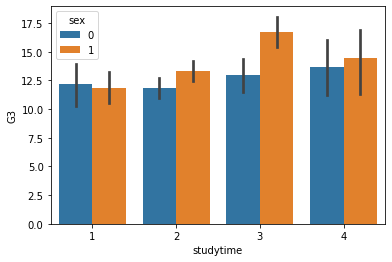

In [29]:
sns.barplot(x='studytime',y='G3',hue='sex',data=df)

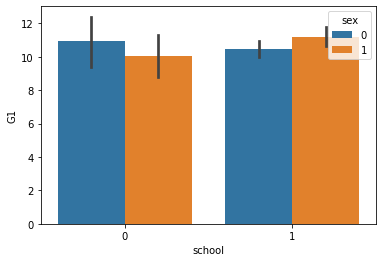

In [30]:
sns.barplot(x='school',y='G1',hue='sex',data=df)

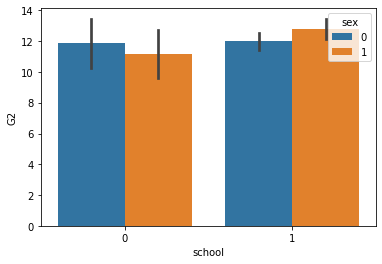

In [31]:
sns.barplot(x='school',y='G2',hue='sex',data=df)

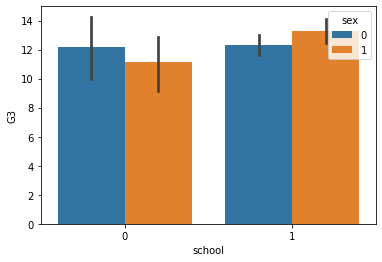

In [32]:
sns.barplot(x='school',y='G3',hue='sex',data=df)


In [33]:
#make OneHotEncoder on columns Fjob and Mjob
ahmed = OneHotEncoder()
feature_array = ahmed.fit_transform(df[["Fjob","Mjob"]]).toarray()


In [34]:
#get unique values from columns Fjob and Mjob and change their name that for father add F_ and for mother add M_
feature_lable = ahmed.categories_
feature_lable[0] = 'F_' + feature_lable[0]
feature_lable[1] = 'M_' + feature_lable[1]

In [35]:
#concat the two arrays into one array 
feature_lable =np.array(feature_lable).ravel()
new_cols = pd.DataFrame(feature_array, columns= feature_lable)

In [36]:
df = pd.concat([df,new_cols],axis=1)

In [37]:
df.drop(labels =['Fjob','Mjob'],inplace=True,axis=1)


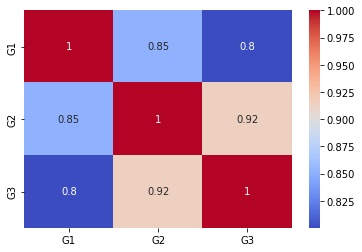

In [38]:
sns.heatmap(df[['G1','G2','G3']].corr(),annot=True,cmap='coolwarm')

correlation between exams

In [39]:
df.describe()

,school,sex,age,goout,internet,romantic,studytime,failures,health,absences,...,F_at_home,F_health,F_other,F_services,F_teacher,M_at_home,M_health,M_other,M_services,M_teacher
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.473418,16.696203,3.108861,0.832911,0.334177,2.035443,0.334177,3.554430,5.708861,...,0.050633,0.045570,0.549367,0.281013,0.073418,0.149367,0.086076,0.356962,0.260759,0.146835
std,0.321177,0.499926,1.276043,1.113278,0.373528,0.472300,0.839240,0.743651,1.390303,8.003096,...,0.219525,0.208814,0.498188,0.450064,0.261152,0.356902,0.280832,0.479711,0.439606,0.354391
min,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,16.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,17.000000,3.000000,1.000000,0.000000,2.000000,0.000000,4.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,18.000000,4.000000,1.000000,1.000000,2.000000,0.000000,5.000000,8.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,5.000000,1.000000,1.000000,4.000000,3.000000,5.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


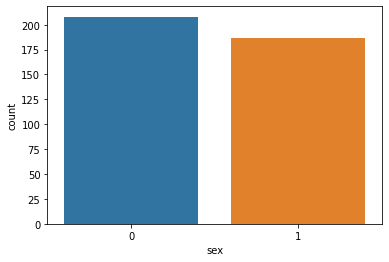

In [40]:
sns.countplot(x='sex',data=df)

show number of males and females

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


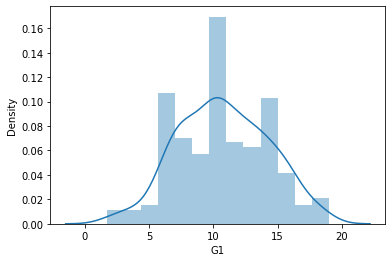

In [41]:
sns.distplot(df["G1"])

most of student get 10 in g1 exam

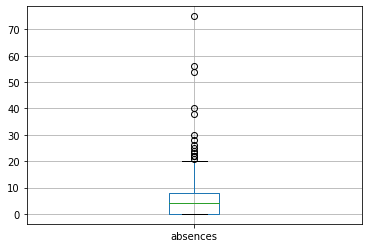

In [42]:
plot_boxplot(df, "absences")

show the col absence with outliers

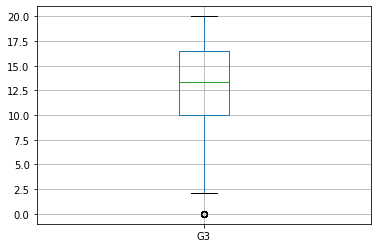

In [43]:
plot_boxplot(df, "G3")

show the col G3 with outliers

In [44]:
df

,school,sex,age,goout,internet,romantic,studytime,failures,health,absences,...,F_at_home,F_health,F_other,F_services,F_teacher,M_at_home,M_health,M_other,M_services,M_teacher
0,1,0,18,4,0,0,2,0,3,6,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,0,17,3,1,0,2,0,3,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,15,2,1,0,2,3,3,10,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,15,2,1,1,3,0,5,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,16,2,0,0,2,0,5,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,4,0,0,2,2,4,11,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
391,0,1,17,5,1,0,1,0,2,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
392,0,1,21,3,0,0,1,3,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
393,0,1,18,1,1,0,1,0,5,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
#use outliers function on columns 
index_list = []
for feature in ["age","goout","studytime","failures","health","absences","G1","G2","G3"]:
  index_list.extend(outliars(df, feature))

In [46]:
df = remove_row(df, index_list)

that show the deffernce between the data frame shape with and without outliars

In [47]:
df.shape

(271, 23)

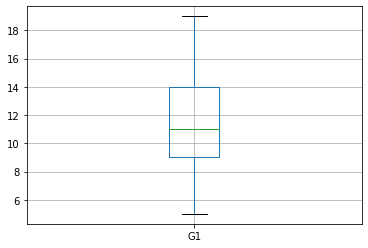

In [48]:
plot_boxplot(df, "G1")

show g1 without outliers

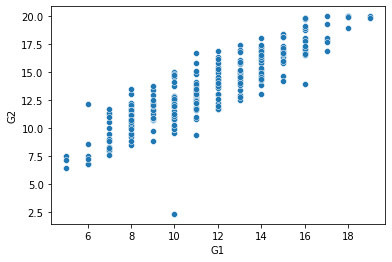

In [49]:
sns.scatterplot(x='G1',y='G2',data=df)

show colleration between two exams before clustering

In [50]:
#transform data to float data type
df = df.astype(float)

In [51]:
#prepare data for kmean 
scaler = StandardScaler()
df1 = scaler.fit_transform(df)

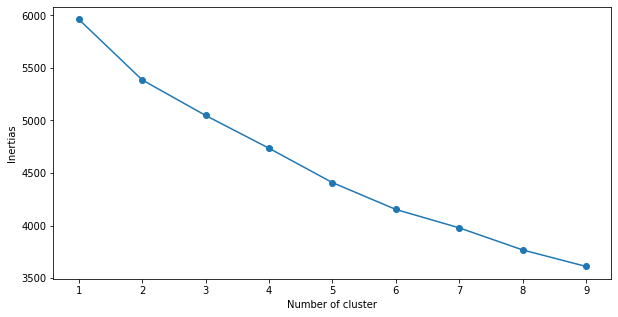

In [52]:
optimise_k_mean(df1,10)

We couldn't specify the number of cluster so we used two cluster


In [53]:
#kmean
Kmean = KMeans(n_clusters=2)
Kmean.fit_predict(df1)
s = (Kmean.labels_)
dff = df.copy()

In [54]:
#make a new column named k2 that has the result of kmean and added to data frame
dff['k2'] = s

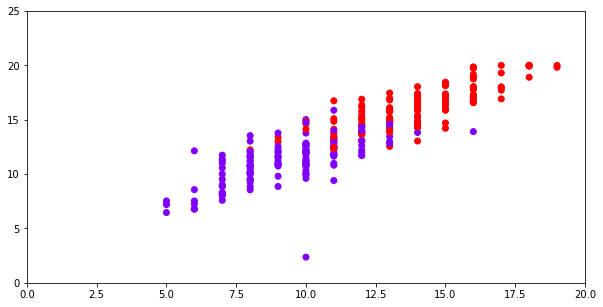

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(dff["G1"],dff["G2"],c=dff["k2"],cmap='rainbow')
plt.xlim(0,20)
plt.ylim(0,25)
plt.show()

show g1 and g2 after clustering

In [56]:
dff

,school,sex,age,goout,internet,romantic,studytime,failures,health,absences,...,F_health,F_other,F_services,F_teacher,M_at_home,M_health,M_other,M_services,M_teacher,k2
0,1.0,0.0,18.0,4.0,0.0,0.0,2.0,0.0,3.0,6.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,17.0,3.0,1.0,0.0,2.0,0.0,3.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,15.0,2.0,1.0,1.0,3.0,0.0,5.0,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,1.0,0.0,16.0,2.0,0.0,0.0,2.0,0.0,5.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,1.0,1.0,16.0,2.0,1.0,0.0,2.0,0.0,5.0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.0,0.0,18.0,3.0,1.0,1.0,1.0,0.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
388,0.0,0.0,18.0,4.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
391,0.0,1.0,17.0,5.0,1.0,0.0,1.0,0.0,2.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
393,0.0,1.0,18.0,1.0,1.0,0.0,1.0,0.0,5.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


# ***senario 1***

In [57]:
#prepare data for cluster after kmean using the new column k2
x1 = dff.iloc[:, :23]
y1 = dff["k2"]
x1 = (x1 - x1.mean()) / x1.std()
x_train,x_test,y_train,y_test = train_test(x1,y1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in 

In [58]:
logisticr(x_train,y_train,x_test,y_test)

accuracy 97.05882352941177 %


In [59]:
km(x_train,y_train,x_test,y_test)

accuracy 86.76470588235294 %


In [60]:
dtc(x_train,y_train,x_test,y_test)

accuracy 80.88235294117648 %


In [61]:
svm(x_train,y_train,x_test,y_test)

accuracy 91.17647058823529 %


In [62]:
forst(x_train,y_train,x_test,y_test)

accuracy 85.29411764705883 %


In [63]:
kn(x_train,y_train,x_test,y_test)

accuracy 95.58823529411765 %


logistic is best accuracy

# ***senario 2***

In [64]:
#prepare data for regression on G3 
x2 = df.copy()
x2.drop(labels =['G3'],inplace=True,axis=1)
y2 = df.G3
x2 = (x2 - x2.mean()) / x2.std()
x_train1,x_test1,y_train1,y_test1 = train_test(x2,y2)
x2 = np.nan_to_num(x2);

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in 

In [65]:
#LinearRegression
model_linreg = LinearRegression()
model_linreg = model_linreg.fit(x_train1, y_train1)
y_pred_linreg = model_linreg.predict(x_test1)

mse = mean_squared_error(y_test1, y_pred_linreg)
print('\nMean squared error Testing Set:', round(mse, 2))

mae = mean_absolute_error(y_test1, y_pred_linreg)
print('Mean absolute error Testing Set:', round(mae, 2))

rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse, 2))


Mean squared error Testing Set: 1.63
Mean absolute error Testing Set: 0.85
Root Mean Squared Error Testing Set: 1.28


In [66]:
#DecisionTreeRegression
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr = model_dtr.fit(x_train1, y_train1)
y_pred_dtr = model_dtr.predict(x_test1)

mse = mean_squared_error(y_test1, y_pred_dtr)
print('\nMean squared error Testing Set:', round(mse, 2))

mae = mean_absolute_error(y_test1, y_pred_dtr)
print('Mean absolute error Testing Set:', round(mae, 2))

rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse, 2))


Mean squared error Testing Set: 5.93
Mean absolute error Testing Set: 1.42
Root Mean Squared Error Testing Set: 2.44


In [67]:
#RandomForestRegression
model_rfr = RandomForestRegressor(random_state=42)
model_rfr = model_rfr.fit(x_train1, y_train1)
y_pred_rfr = model_rfr.predict(x_test1)


mse = mean_squared_error(y_test1, y_pred_rfr)
print('\nMean squared error Testing Set:', round(mse, 2))

mae = mean_absolute_error(y_test1, y_pred_rfr)
print('Mean absolute error Testing Set:', round(mae, 2))

rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse, 2))


Mean squared error Testing Set: 1.78
Mean absolute error Testing Set: 0.91
Root Mean Squared Error Testing Set: 1.34


In [68]:
#Ridge algorithm
model_ridge = Ridge(random_state=42)
model_ridge = model_ridge.fit(x_train1, y_train1)
y_pred_ridge = model_ridge.predict(x_test1)

mse = mean_squared_error(y_test1, y_pred_ridge)
print('\nMean squared error Testing Set:', round(mse, 2))

mae = mean_absolute_error(y_test1, y_pred_ridge)
print('Mean absolute error Testing Set:', round(mae, 2))

rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse, 2))


Mean squared error Testing Set: 1.64
Mean absolute error Testing Set: 0.85
Root Mean Squared Error Testing Set: 1.28


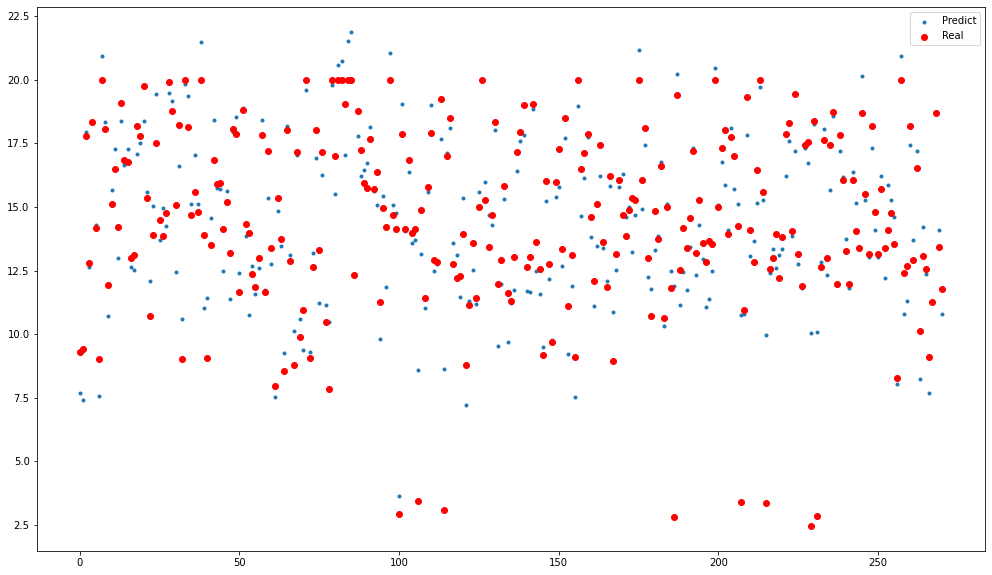

In [69]:
#this plot show deffrence between predict and real 
fig = plt.figure(figsize=(17, 10))

plt.scatter(range(x2.shape[0]), model_ridge.predict(x2), marker='.', label='Predict')
plt.scatter(range(x2.shape[0]), y2, color='red', label='Real')
plt.legend(loc='best', prop={'size': 10})
plt.show()

# ***senario 3 ***

In [70]:
#prepare data classification using school as predicted value
x3 = df.copy()
x3.drop(labels =['school'],inplace=True,axis=1)
y3 = df.school
x3 = (x3 - x3.mean()) / x3.std()
x_train3,x_test3,y_train3,y_test3 = train_test(x3,y3)
x3 = np.nan_to_num(x3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in 

In [71]:
logisticr(x_train3,y_train3,x_test3,y_test3)

accuracy 89.70588235294117 %


In [72]:
km(x_train3,y_train3,x_test3,y_test3)

accuracy 85.29411764705883 %


In [73]:
dtc(x_train3,y_train3,x_test3,y_test3)

accuracy 83.82352941176471 %


In [74]:
svm(x_train3,y_train3,x_test3,y_test3)

accuracy 88.23529411764706 %


In [75]:
forst(x_train3,y_train3,x_test3,y_test3)

accuracy 88.23529411764706 %


In [76]:
kn(x_train3,y_train3,x_test3,y_test3)

accuracy 88.23529411764706 %


In [77]:
pca = PCA(n_components=2)
pca.fit(df)
PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.5045899  0.33800847]
[91.01298513 74.48998336]
